## 사용 패키지

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'

from sklearn.ensemble import RandomForestRegressor

from pycaret.regression import *

## 데이터 로드

In [2]:
train = pd.read_csv('G:\내 드라이브\Github\Dacon_Prediction-of-number-AI/train.csv')
test = pd.read_csv('G:\내 드라이브\Github\Dacon_Prediction-of-number-AI/test.csv')
submission = pd.read_csv('G:\내 드라이브\Github\Dacon_Prediction-of-number-AI/sample_submission.csv')

# temp = pd.read_csv('G:\내 드라이브\Github\Dacon_Prediction-of-number-AI/진주체감온도.csv')
# rain = pd.read_csv(('G:\내 드라이브\Github\Dacon_Prediction-of-number-AI/진주강수.csv'))

In [3]:
# temp.columns = ['일자','기온','풍속','체감기온']

In [4]:
# train = pd.merge(train, temp)
# test = pd.merge(test, temp)

In [5]:
# rain.columns = ['일자', '강수량']
# rain.fillna(0, inplace=True)

In [6]:
# train = pd.merge(train,rain)
# test = pd.merge(test, rain)

In [7]:
# plt.figure(figsize=(12,6))
# sns.barplot(train['일'], train['강수량'])

In [8]:
# plt.figure(figsize=(12,6))
# sns.regplot(train2['강수량'] , train2['중식계'])

In [9]:
# expr = train['강수량'] > 80

In [10]:
# train2 = train[expr]

In [11]:
# train2

In [12]:
train.corr()

,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식계,석식계
본사정원수,1.000000,0.244666,-0.061688,0.146544,0.452293,-0.115529,-0.173852
본사휴가자수,0.244666,1.000000,-0.273318,-0.230789,0.065397,-0.391975,-0.316894
본사출장자수,-0.061688,-0.273318,1.000000,-0.308757,-0.352643,-0.512680,-0.188164
본사시간외근무명령서승인건수,0.146544,-0.230789,-0.308757,1.000000,0.156792,0.535611,0.571168
현본사소속재택근무자수,0.452293,0.065397,-0.352643,0.156792,1.000000,0.076509,-0.057534
중식계,-0.115529,-0.391975,-0.512680,0.535611,0.076509,1.000000,0.508287
석식계,-0.173852,-0.316894,-0.188164,0.571168,-0.057534,0.508287,1.000000


## 데이터

## 요일을 숫자로 매핑

In [13]:
#train['요일'] = train['요일'].map({'월':1, '화':2, '수':3, '목':4, '금':5})
#test['요일'] = test['요일'].map({'월':1, '화':2, '수':3, '목':4, '금':5})

## `요일 랭크지정 방식.`
## 석식에만 적용! 석식 수요일이 자기개발의 날 때문에 적어서.

In [14]:
weekdayrankfordinner = {
    '월' : 1,
    '화' : 2,
    '수' : 5,
    '목' : 3,
    '금' : 4
} 

train['요일(석식)'] = train['요일'].map(weekdayrankfordinner)
test['요일(석식)'] = test['요일'].map(weekdayrankfordinner)

## `월, 일을 숫자형으로 변환`

In [15]:
train['일자'] = pd.to_datetime(train['일자'])
test['일자'] = pd.to_datetime(test['일자'])

print(train['일자'])

train['년'] = train['일자'].dt.year
train['월'] = train['일자'].dt.month
train['일'] = train['일자'].dt.day
train['주'] = train['일자'].dt.isocalendar().week
train['요일'] = train['일자'].dt.weekday


test['년'] = test['일자'].dt.year
test['월'] = test['일자'].dt.month
test['일'] = test['일자'].dt.day
test['주'] = test['일자'].dt.isocalendar().week
test['요일'] = test['일자'].dt.weekday

train['주'] = train['주'].astype('int') # '주'의 타입이 Uint로 사용이 안되어 int로 변경해줌.
test['주'] = test['주'].astype('int')



0      2016-02-01
1      2016-02-02
2      2016-02-03
3      2016-02-04
4      2016-02-05
          ...    
1200   2021-01-20
1201   2021-01-21
1202   2021-01-22
1203   2021-01-25
1204   2021-01-26
Name: 일자, Length: 1205, dtype: datetime64[ns]


## `0712 비율변수 추가`

## `월 랭크지정 방식` 낮은게 12 큰게 1 요일 랭크와 동일

In [16]:
month1 = {
    1:3,
    2:1,
    3:2,
    4:6,
    5:7,
    6:8,
    7:10,
    8:9,
    9:5,
    10:4,
    11:11,
    12:12
}

month2 = {
    1:11,
    2:2,
    3:1,
    4:4,
    5:8,
    6:6,
    7:9,
    8:7,
    9:5,
    10:3,
    11:10,
    12:12
}
train['월(중식)'] = train['월'].map(month1)
test['월(중식)'] = test['월'].map(month1)

train['월(석식)'] = train['월'].map(month2)
test['월(석식)'] = test['월'].map(month2)

train['월(중식)'] = train['월(중식)'].astype('int') # float형이라 int로 변경
test['월(중식)'] = test['월(중식)'].astype('int')
train['월(석식)'] = train['월(석식)'].astype('int')
test['월(석식)'] = test['월(석식)'].astype('int')

## `주 랭크지정 방식`


In [17]:
# #중식
# week1 = {
#     52	:	52	,
#     31	:	51	,
#     33	:	50	,
#     30	:	49	,
#     32	:	48	,
#     18	:	47	,
#     46	:	46	,
#     45	:	45	,
#     47	:	44	,
#     21	:	43	,
#     44	:	42	,
#     23	:	41	,
#     51	:	40	,
#     43	:	39	,
#     28	:	38	,
#     29	:	37	,
#     42	:	36	,
#     24	:	35	,
#     17	:	34	,
#     22	:	33	,
#     26	:	32	,
#     25	:	31	,
#     27	:	30	,
#     20	:	29	,
#     15	:	28	,
#     14	:	27	,
#     16	:	26	,
#     50	:	25	,
#     19	:	24	,
#     1	:	23	,
#     3	:	22	,
#     39	:	21	,
#     36	:	20	,
#     48	:	19	,
#     2	:	18	,
#     4	:	17	,
#     37	:	16	,
#     34	:	15	,
#     13	:	14	,
#     49	:	13	,
#     35	:	12	,
#     38	:	11	,
#     12	:	10	,
#     11	:	9	,
#     6	:	8	,
#     5	:	7	,
#     9	:	6	,
#     8	:	5	,
#     10	:	4	,
#     41	:	3	,
#     7	:	2	,
#     40	:	1	
# }

# #석식 위부터 작은수임

# week2 = {
#     52	:	52	,
#     1	:	51	,
#     31	:	50	,
#     4	:	49	,
#     48	:	48	,
#     30	:	47	,
#     26	:	46	,
#     51	:	45	,
#     43	:	44	,
#     44	:	43	,
#     46	:	42	,
#     2	:	41	,
#     17	:	40	,
#     22	:	39	,
#     33	:	38	,
#     39	:	37	,
#     29	:	36	,
#     3	:	35	,
#     32	:	34	,
#     45	:	33	,
#     18	:	32	,
#     5	:	31	,
#     47	:	30	,
#     35	:	29	,
#     23	:	28	,
#     28	:	27	,
#     37	:	26	,
#     21	:	25	,
#     19	:	24	,
#     27	:	23	,
#     24	:	22	,
#     42	:	21	,
#     9	:	20	,
#     20	:	19	,
#     38	:	18	,
#     50	:	17	,
#     25	:	16	,
#     13	:	15	,
#     16	:	14	,
#     49	:	13	,
#     12	:	12	,
#     36	:	11	,
#     15	:	10	,
#     14	:	9	,
#     34	:	8	,
#     6	:	7	,
#     11	:	6	,
#     8	:	5	,
#     7	:	4	,
#     41	:	3	,
#     10	:	2	,
#     40	:	1	
# }

# train['주(중식)'] = train['주'].map(week1)
# test['주(중식)'] = test['주'].map(week1)

# train['주(석식)'] = train['주'].map(week2)
# test['주(석식)'] = test['주'].map(week2)

# train['주(중식)'] = train['주(중식)'].astype('int') # float형이라 int로 변경
# test['주(중식)'] = test['주(중식)'].astype('int')
# train['주(석식)'] = train['주(석식)'].astype('int')
# test['주(석식)'] = test['주(석식)'].astype('int')

## `연도 랭크지정 방식` 효과 X

In [18]:
# year1 = {
#     2021 : 1,
#     2016 : 3,
#     2017 : 2,
#     2018 : 4,
#     2020 : 5,
#     2019 : 6
# }


# year2 = {
#     2016 : 1,
#     2017 : 3,
#     2018 : 2,
#     2019 : 4,
#     2020 : 5,
#     2021 : 6
# }





# train['년(중식)'] = train['년'].map(year1)
# test['년(중식)'] = test['년'].map(year1)

# train['년(석식)'] = train['년'].map(year2)
# test['년(석식)'] = test['년'].map(year2)

# train['년(중식)'] = train['년(중식)'].astype('int') # float형이라 int로 변경
# test['년(중식)'] = test['년(중식)'].astype('int')
# train['년(석식)'] = train['년(석식)'].astype('int')
# test['년(석식)'] = test['년(석식)'].astype('int')

## `일 랭크지정방식 ` 효과 X 사용안함

## `식사가능자수`

In [19]:
train['식사가능자수'] = (train['본사정원수'] - train['본사휴가자수'] - train['현본사소속재택근무자수'])
test['식사가능자수'] = (test['본사정원수'] - test['본사휴가자수'] - test['현본사소속재택근무자수'])

In [20]:
#train['중식참여율'] = train['중식계'] / train['식사가능자수']
#train['석식참여율'] = train['석식계'] / train['식사가능자수']

#test['중식참여율'] = test['중식계'] / test['식사가능자수']
#test['석식참여율'] = test['석식계'] / test['식사가능자수']

In [21]:
train['식사가능자수']

0       2551.0
1       2551.0
2       2545.0
3       2497.0
4       2323.0
         ...  
1200    2517.0
1201    2540.0
1202    2425.0
1203    2549.0
1204    2552.0
Name: 식사가능자수, Length: 1205, dtype: float64

# `0708 공휴일 전후 추가 `

## `0713 공휴일 변경`

In [22]:
drops = ['조식메뉴', '중식메뉴', '석식메뉴']

train = train.drop(drops, axis=1)
test = test.drop(drops, axis=1)

In [23]:
#휴일
train['휴일전날'] = 0
test['휴일전날'] = 0

train['휴일다음날'] = 0
test['휴일다음날'] = 0

#연휴 (주말포함 3일이상 휴일)
train['연휴전날'] = 0
test['연휴전날'] = 0

train['연휴다음날'] = 0
test['연휴다음날'] = 0

In [24]:
train['휴일다음날'][train['요일'] == 0] = 1 # 월요일
test['휴일다음날'][test['요일'] == 0] = 1

train['휴일전날'][train['요일'] == 4] = 1 # 금요일
test['휴일전날'][test['요일'] == 4] = 1

# 2016년
train['휴일전날'][17] = 1
train['휴일전날'][47] = 1
train['휴일전날'][62] = 1
train['휴일전날'][17] = 1
train['휴일전날'][152] = 1

train['휴일다음날'][5] = 1
train['휴일다음날'][18] = 1
train['휴일다음날'][48] = 1
train['휴일다음날'][83] = 1
train['휴일다음날'][132] = 1
train['휴일다음날'][163] = 1

#2017년
train['휴일전날'][245] = 1
train['휴일전날'][268] = 1
train['휴일전날'][309] = 1
train['휴일전날'][310] = 1
train['휴일전날'][330] = 1
train['휴일전날'][379] = 1

train['휴일다음날'][227] = 1
train['휴일다음날'][246] = 1
train['휴일다음날'][267] = 1
train['휴일다음날'][309] = 1
train['휴일다음날'][310] = 1
train['휴일다음날'][331] = 1
train['휴일다음날'][380] = 1
train['휴일다음날'][413] = 1
train['휴일다음날'][467] = 1


#2018년
train['휴일전날'][502] = 1
train['휴일전날'][510] = 1
train['휴일전날'][555] = 1
train['휴일전날'][565] = 1
train['휴일전날'][575] = 1
train['휴일전날'][579] = 1
train['휴일전날'][623] = 1
train['휴일전날'][651] = 1
train['휴일전날'][705] = 1
train['휴일전날'][709] = 1

train['휴일다음날'][471] = 1
train['휴일다음날'][511] = 1
train['휴일다음날'][556] = 1
train['휴일다음날'][566] = 1
train['휴일다음날'][576] = 1
train['휴일다음날'][580] = 1
train['휴일다음날'][624] = 1
train['휴일다음날'][652] = 1
train['휴일다음날'][706] = 1


#2019년
train['휴일전날'][728] = 1
train['휴일전날'][814] = 1
train['휴일전날'][863] = 1
train['휴일전날'][882] = 1
train['휴일전날'][894] = 1
train['휴일전날'][897] = 1
train['휴일전날'][951] = 1
train['휴일전날'][893] = 1
train['휴일전날'][955] = 1

train['휴일다음날'][710] = 1
train['휴일다음날'][733] = 1
train['휴일다음날'][793] = 1
train['휴일다음날'][815] = 1
train['휴일다음날'][864] = 1
train['휴일다음날'][894] = 1
train['휴일다음날'][898] = 1
train['휴일다음날'][952] = 1
train['휴일다음날'][895] = 1


#2020년
train['휴일전날'][971] = 1
train['휴일전날'][1027] = 1
train['휴일전날'][1037] = 1
train['휴일전날'][1038] = 1
train['휴일전날'][1133] = 1
train['휴일전날'][1187] = 1

train['휴일다음날'][956] = 1
train['휴일다음날'][972] = 1
train['휴일다음날'][996] = 1
train['휴일다음날'][1028] = 1
train['휴일다음날'][1039] = 1

#2021년
test['휴일전날'][10] = 1
test['휴일다음날'][21] = 1



# # 원핫인코딩
# train = pd.get_dummies(train, columns=['공휴일전후'])
# test = pd.get_dummies(test, columns=['공휴일전후'])

# test['공휴일전후_0'][20] =1
# test['공휴일전후_1'][20] = 0

In [25]:
train.query('휴일전날 == 1').groupby('년').mean()[['중식계','석식계']]

,중식계,석식계
년,,
2016,748.900000,492.980000
2017,663.851852,406.351852
2018,634.672414,400.327586
2019,638.372881,384.101695
2020,643.156863,293.686275
2021,669.000000,248.000000


In [26]:
train.query('연휴전날 == 1').groupby('년').mean()[['중식계','석식계']]

,중식계,석식계
년,,


In [27]:
train.query('휴일다음날 == 1').groupby('년').mean()[['중식계','석식계']]

,중식계,석식계
년,,
2016,1168.280000,575.340000
2017,1123.854545,524.690909
2018,1098.293103,511.500000
2019,1100.491525,529.728814
2020,1129.720000,538.280000
2021,1271.000000,502.750000


In [28]:
train.query('연휴다음날 == 1').groupby('년').mean()[['중식계','석식계']]

,중식계,석식계
년,,


In [29]:
train['휴일다음날'][train['요일'] == 0] = 1
test['휴일다음날'][test['요일'] == 0] = 1

train['휴일전날'][train['요일'] == 4] = 1
test['휴일전날'][test['요일'] == 4] = 1


# 요일 원핫인코딩 
# train = pd.get_dummies(train, columns=['요일'])
# test = pd.get_dummies(test, columns=['요일'])
# 요일_0 : 월 / 요일_1 : 화 / 요일_2 : 수 / 요일_3 : 목 / 요일_4 : 금

In [30]:
train.groupby('휴일전날').mean()[['중식계','석식계']]

,중식계,석식계
휴일전날,,
0,957.287097,481.979570
1,663.912727,393.436364


In [31]:
train.groupby('휴일다음날').mean()[['중식계','석식계']]

,중식계,석식계
휴일다음날,,
0,820.696448,440.220667
1,1124.731884,534.315217


In [32]:
train.groupby('연휴전날').mean()[['중식계','석식계']]

,중식계,석식계
연휴전날,,
0,890.33444,461.772614


In [33]:
train.groupby('연휴다음날').mean()[['중식계','석식계']]

,중식계,석식계
연휴다음날,,
0,890.33444,461.772614


## `0714 연휴 전 후 추가(주말포함 3일이상 휴일)`

In [34]:
#2016
train['연휴전날'][4] = 1
train['연휴전날'][82] = 1 #
train['연휴전날'][131] = 1
train['연휴전날'][152] = 1
train['연휴전날'][162] = 1 #

train['연휴다음날'][5] = 1
train['연휴다음날'][83] = 1
train['연휴다음날'][132] = 1
train['연휴다음날'][153] = 1
train['연휴다음날'][163] = 1


#2017
train['연휴전날'][245] = 1
train['연휴전날'][309] = 1
train['연휴전날'][310] = 2
train['연휴전날'][412] = 1
train['연휴전날'][466] = 1 #
train['연휴전날'][470] = 1

train['연휴다음날'][246] = 1
train['연휴다음날'][309] = 1 #
train['연휴다음날'][310] = 1 #
train['연휴다음날'][413] = 1
train['연휴다음날'][467] = 1 #


#2018
train['연휴전날'][502] = 2
train['연휴전날'][555] = 1 #
train['연휴전날'][650] = 1

train['연휴다음날'][471] = 1
train['연휴다음날'][503] = 1
train['연휴다음날'][556] = 1
train['연휴다음날'][651] = 1

#2019
train['연휴전날'][732] = 1
train['연휴전날'][748] = 1
train['연휴전날'][792] = 1
train['연휴전날'][882] = 1

train['연휴다음날'][733] = 1
train['연휴다음날'][749] = 1 #
train['연휴다음날'][793] = 1 #
train['연휴다음날'][883] = 1

#2020
train['연휴전날'][971] = 1
train['연휴전날'][1129] = 1
train['연휴전날'][1187] = 1

train['연휴다음날'][972] = 1
train['연휴다음날'][1130] = 1

#2021
test['연휴전날'][10] = 1
test['연휴전날'][20] = 1 # 같은달에 설날이 있어서 휴가 제한


train['연휴다음날'][1188] = 1

test['연휴다음날'][11] = 1
test['연휴다음날'][21] = 1 


In [35]:
train.iloc[705]

일자                2018-12-24 00:00:00
요일                                  0
본사정원수                            2846
본사휴가자수                            894
본사출장자수                            159
본사시간외근무명령서승인건수                     26
현본사소속재택근무자수                       0.0
중식계                             296.0
석식계                             104.0
요일(석식)                              1
년                                2018
월                                  12
일                                  24
주                                  52
월(중식)                              12
월(석식)                              12
식사가능자수                         1952.0
휴일전날                                1
휴일다음날                               1
연휴전날                                0
연휴다음날                               0
Name: 705, dtype: object

## Feature

In [36]:
#x_train = train[['요일', '본사정원수', '본사출장자수', '본사시간외근무명령서승인건수', '현본사소속재택근무자수']]
#y1_train = train['중식계']
#y2_train = train['석식계']

#x_test = test[['요일', '본사정원수', '본사출장자수', '본사시간외근무명령서승인건수', '현본사소속재택근무자수']]

In [37]:
x1_train = train[['요일', '본사시간외근무명령서승인건수', '식사가능자수','월(중식)', '일','공휴일전후_0','공휴일전후_1','공휴일전후_2','본사출장자수']] #중식계
x2_train = train[['요일(석식)', '본사시간외근무명령서승인건수', '식사가능자수','월(석식)', '일','공휴일전후_0','공휴일전후_1','공휴일전후_2','본사출장자수']] #석식계

y1_train = train['중식계']
y2_train = train['석식계']

x1_test = test[['요일', '본사시간외근무명령서승인건수', '식사가능자수', '월(중식)', '일','공휴일전후_0','공휴일전후_1','공휴일전후_2','본사출장자수']]
x2_test = test[['요일(석식)', '본사시간외근무명령서승인건수', '식사가능자수', '월(석식)', '일','공휴일전후_0','공휴일전후_1','공휴일전후_2','본사출장자수']]

KeyError: "['공휴일전후_0', '공휴일전후_1', '공휴일전후_2'] not in index"

## `0714 연휴 전, 후` (주말포함 3일 이상 휴일)

In [38]:
x1_train = train[['본사시간외근무명령서승인건수', '식사가능자수','본사출장자수','월(중식)','일','휴일전날','휴일다음날','연휴전날','연휴다음날','요일']] #중식계
x2_train = train[['본사시간외근무명령서승인건수', '식사가능자수','본사출장자수','월(석식)','일','휴일전날','휴일다음날','연휴전날','연휴다음날','요일(석식)']] #석식계

y1_train = train['중식계']
y2_train = train['석식계']

x1_test = test[['본사시간외근무명령서승인건수', '식사가능자수','본사출장자수', '월(중식)','일','휴일전날','휴일다음날','연휴전날','연휴다음날','요일']]
x2_test = test[['본사시간외근무명령서승인건수', '식사가능자수','본사출장자수', '월(석식)','일','휴일전날','휴일다음날','연휴전날','연휴다음날','요일(석식)']]

In [40]:
x1_train = train[['본사시간외근무명령서승인건수', '식사가능자수','본사출장자수','월(중식)','일','휴일전날','요일']] #중식계
x2_train = train[['본사시간외근무명령서승인건수', '식사가능자수','본사출장자수','월(석식)','일','휴일전날','요일(석식)']] #석식계

y1_train = train['중식계']
y2_train = train['석식계']

x1_test = test[['본사시간외근무명령서승인건수', '식사가능자수','본사출장자수', '월(중식)','일','휴일전날','요일']]
x2_test = test[['본사시간외근무명령서승인건수', '식사가능자수','본사출장자수', '월(석식)','일','휴일전날','요일(석식)']]

In [ ]:
train.query('휴일전날 == 1')[['일자','요일','중식계','석식계']]

In [95]:
train.query('휴일다음날 == 1')[['일자','요일','중식계','석식계']]

,일자,요일,중식계,석식계
0,2016-02-01,0,1039.0,331.0
5,2016-02-11,3,1045.0,550.0
7,2016-02-15,0,1268.0,672.0
12,2016-02-22,0,1298.0,645.0
17,2016-02-29,0,869.0,344.0
...,...,...,...,...
1184,2020-12-21,0,1256.0,327.0
1188,2021-01-04,0,1405.0,598.0
1193,2021-01-11,0,1257.0,451.0
1198,2021-01-18,0,1277.0,460.0


In [96]:
test.query('연휴전날 == 1')[['일자','요일']]

,일자,요일
10,2021-02-10,2
20,2021-02-26,4


## 점심과 저녁을 식수 인원을 예측할 2개 모델 생성

In [97]:
# model1 = RandomForestRegressor(n_jobs=-1, random_state=42)
# model2 = RandomForestRegressor(n_jobs=-1, random_state=42)

## 학습

In [98]:
# model1.fit(x1_train, y1_train) #중식계
# model2.fit(x2_train, y2_train) #석식계

## 추론

In [99]:
# pred1 = model1.predict(x1_test)
# pred2 = model2.predict(x2_test)

## 결과 제출

In [100]:
# submission['중식계'] = pred1
# submission['석식계'] = pred2

In [101]:
# submission.to_csv('baseline.csv', index=False)

# `Kfold 적용 버전`

In [102]:
# from sklearn.model_selection import KFold
# k_fold = KFold(n_splits = 5, shuffle = True, random_state = 777)

In [103]:
# model1.fit(x1_train, y1_train) #중식계
# model2.fit(x2_train, y2_train) #석식계

In [104]:
# model1 = cat
# models1 = [] # 교차검증을 위한 바구나 5개

# for train_idx, val_idx in k_fold.split(x1_train):
#     x1_t = x1_train.iloc[train_idx]
#     y1_t = y1_train.iloc[train_idx]
#     x1_val = x1_train.iloc[val_idx]
#     y1_val = y1_train.iloc[val_idx]
    
#      models1.append(model1.fit(x1_t, y1_t))#, eval_set = (x1_val, y1_val), early_stopping_rounds=100, verbose = 100))

# preds1 = []
# for model1 in models1:
#     preds1.append(model1.predict(x1_test))    


# model2 = cat
# models2 = [] # 교차검증을 위한 바구나 5개

# for train_idx, val_idx in k_fold.split(x2_train):
#     x2_t = x2_train.iloc[train_idx]
#     y2_t = y2_train.iloc[train_idx]
#     x2_val = x2_train.iloc[val_idx]
#     y2_val = y2_train.iloc[val_idx]
    
#     models2.append(model2.fit(x2_t, y2_t))#, eval_set = (x2_val, y2_val), early_stopping_rounds=100, verbose = 100))
    

# preds2 = []
# for model2 in models2:
#     preds2.append(model2.predict(x2_test))

In [105]:
# pred1 = np.mean(preds1, axis=0)
# pred2 = np.mean(preds2, axis=0)

In [106]:
# submission['중식계'] = pred1
# submission['석식계'] = pred2

In [107]:
# submission.to_csv('baseline0712.csv', index=False)

In [108]:
train.query('요일 == 2 & 일 >=24')[['일자','중식계','석식계']]

,일자,중식계,석식계
14,2016-02-24,1022.0,514.0
38,2016-03-30,1033.0,463.0
57,2016-04-27,1028.0,490.0
75,2016-05-25,938.0,454.0
99,2016-06-29,820.0,487.0
119,2016-07-27,872.0,423.0
138,2016-08-24,941.0,588.0
143,2016-08-31,915.0,498.0
160,2016-09-28,1128.0,591.0
179,2016-10-26,854.0,410.0


## `앙상블 모델 적용 버전`

In [41]:
# 메뉴
train_lunch = pd.concat([x1_train, train['중식계']], axis = 1) # concat cbind 역할
train_dinner = pd.concat([x2_train, train['석식계']], axis = 1)
test_lunch = pd.concat([x1_test], axis = 1)
test_dinner = pd.concat([x2_test], axis = 1)
print('done')

done


### 중식 모델링

In [42]:
reg = setup(data=pd.concat([x1_train,train['중식계']], axis=1), # concat cbind 역할
            target='중식계',
            numeric_imputation = 'mean',
            normalize = True,
            silent= True)
print('done')

,Description,Value
0,session_id,3443
1,Target,중식계
2,Original Data,"(1205, 8)"
3,Missing Values,False
4,Numeric Features,5
5,Categorical Features,2
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(843, 11)"


done


In [43]:
best_5_l = compare_models(sort='MAE', n_select=5)
print('done')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,71.0293,9474.2319,96.0941,0.7823,0.1200,0.0873,1.9900
gbr,Gradient Boosting Regressor,73.2368,9699.0749,97.7766,0.7743,0.1237,0.0901,0.0780
et,Extra Trees Regressor,74.4224,10174.7114,100.0021,0.7637,0.1251,0.0916,0.2000
rf,Random Forest Regressor,74.4327,10049.3393,99.6017,0.7661,0.1248,0.0919,0.3370
lightgbm,Light Gradient Boosting Machine,76.3760,10560.5000,102.0336,0.7552,0.1281,0.0934,0.0560
knn,K Neighbors Regressor,82.0795,11739.3365,107.6744,0.7229,0.1360,0.1020,0.0190
huber,Huber Regressor,82.8015,13146.2776,113.4520,0.6972,0.1464,0.1063,0.0390
ada,AdaBoost Regressor,83.4035,11727.3723,107.8088,0.7278,0.1356,0.1039,0.0880
lasso,Lasso Regression,84.8923,12510.4397,111.0112,0.7104,0.1419,0.1066,0.0100
ridge,Ridge Regression,84.9606,12416.9507,110.5650,0.7127,0.1410,0.1064,0.0100


done


In [44]:
blended_l = blend_models(estimator_list= best_5_l, fold=5, optimize='MAE')
pred_holdout = predict_model(blended_l)
final_model_l = finalize_model(blended_l)

pred_esb_l = predict_model(final_model_l, test_lunch)

pred_esb_l['Label']

submission_esb = pd.read_csv('G:\내 드라이브\Github\Dacon_Prediction-of-number-AI/sample_submission.csv')
submission_esb['중식계'] = pred_esb_l['Label']

print('done')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,78.9277,12424.2009,111.4639,0.7439,0.1526,0.1074
1,75.0249,9712.4297,98.5517,0.7710,0.1196,0.0898
2,67.2974,7958.6146,89.2111,0.7948,0.1014,0.0786
3,69.2626,8067.5098,89.8193,0.8185,0.1102,0.0837
4,66.0093,8018.6578,89.5470,0.8148,0.1130,0.0776
Mean,71.3044,9236.2826,95.7186,0.7886,0.1194,0.0874
SD,4.9035,1724.5646,8.6160,0.0280,0.0176,0.0109


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,80.0379,11521.9170,107.3402,0.7409,0.1290,0.0963


done


### 석식모델링

In [45]:
reg = setup(data=pd.concat([x2_train,train['석식계']], axis=1), # concat cbind 역할
            target='석식계',
            numeric_imputation = 'mean',
            normalize = True,
            silent= True)
print('done')

,Description,Value
0,session_id,1949
1,Target,석식계
2,Original Data,"(1205, 8)"
3,Missing Values,False
4,Numeric Features,5
5,Categorical Features,2
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(843, 11)"


done


In [46]:
best_5_d = compare_models(sort = 'MAE', n_select = 5)
print('done')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,59.6412,7178.0414,83.8589,0.6398,0.9267,0.1303,0.2120
rf,Random Forest Regressor,60.7619,7535.8584,85.4586,0.6278,0.9287,0.1369,0.2630
catboost,CatBoost Regressor,61.3526,7480.2083,85.7074,0.6269,0.9233,0.1371,1.9400
gbr,Gradient Boosting Regressor,64.2338,8115.7911,89.1888,0.5977,0.9642,0.1419,0.1130
lightgbm,Light Gradient Boosting Machine,64.5274,8243.0680,89.6632,0.5900,0.9258,0.1436,0.0650
knn,K Neighbors Regressor,72.4601,10775.4283,102.8146,0.4671,1.0628,0.1548,0.0160
huber,Huber Regressor,73.7189,12143.6517,108.4958,0.4104,1.1280,0.1471,0.0430
ada,AdaBoost Regressor,76.7111,10773.7821,103.3104,0.4572,1.0504,0.1661,0.0770
lr,Linear Regression,77.1279,11516.1748,106.2884,0.4331,1.0983,0.1579,0.0180
ridge,Ridge Regression,77.1551,11515.5496,106.2916,0.4332,1.0992,0.1581,0.0100


done


In [47]:
blended_d = blend_models(estimator_list = best_5_d, fold = 5, optimize = 'MAE')
pred_holdout = predict_model(blended_d)
final_model_d = finalize_model(blended_d)
pred_esb_d = predict_model(final_model_d, test_dinner)
print('done')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,64.3750,8201.7363,90.5634,0.6317,1.1935,0.1389
1,63.9668,8837.4873,94.0079,0.5226,0.5610,0.1446
2,61.4659,7353.8024,85.7543,0.6151,0.9233,0.1298
3,58.4810,7726.7873,87.9021,0.6309,1.2487,0.1189
4,56.0365,5390.5220,73.4202,0.7375,0.9493,0.1381
Mean,60.8650,7502.0671,86.3296,0.6276,0.9752,0.1341
SD,3.2031,1166.5323,7.0191,0.0683,0.2439,0.0089


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,60.2150,7822.1011,88.4426,0.5368,0.7656,0.1330


done


In [48]:
pred_esb_d = predict_model(final_model_d, test_dinner)

In [49]:
submission_esb['석식계'] = pred_esb_d['Label']
submission_esb

,일자,중식계,석식계
0,2021-01-27,1007.289634,122.491197
1,2021-01-28,952.754981,471.995942
2,2021-01-29,617.407134,213.205380
3,2021-02-01,1242.307097,569.057264
4,2021-02-02,1022.711002,558.592561
5,2021-02-03,1058.961986,515.265650
6,2021-02-04,1009.874658,558.882681
7,2021-02-05,707.577164,397.781719
8,2021-02-08,1287.935264,688.613764
9,2021-02-09,1061.388488,583.751272


In [59]:
submission_esb.to_csv('ensembleW.csv', index = False)

- 0708 23:11

randomforest default mae로 바꿈(대회 측정방식)->mae:73 mse:66 오히려 mse가 더 좋게나왔음..

- 0709 00:28

출장자수 변수추가했더니 1점 높게나옴. 추가할 것

- 0709 20:35
    
체감온도 추가 효과 오히려 감소

- 0709 21:38

월 매핑 -> 0.5점 상승! 체감온도는 그냥 뺐음..

---
- 0710 01:51

앙상블 모델 적용.
효과는 안좋았음. 테스트용으로만 써보자.


`중식` 중식개선필요.

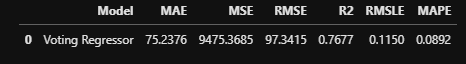

`석식`

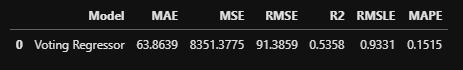

---
- 0711 13:59
    
월 매핑 제대로 안돼있었음.. 수정 후 제출! 63.792 `최고기록`

`중식`

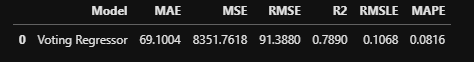

`석식`

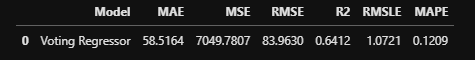


---
- 0711 14:46

연도 매핑 후 연도 추가. 중식은 성능 안좋길래 석식만 넣고 제출 그런데 결과는 68점; 연도 다시 제거!!

`중식`

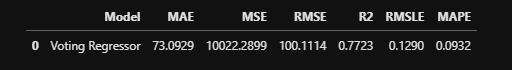

`석식`

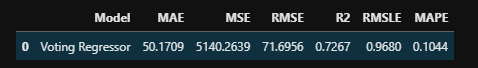

---
- 0711 17:03

일 매핑. 결과 안좋음.. 제거!

---
- 0711 17:26
    
휴가자수 식사가능자수에서 뺐지만 따로 추가해주었음. 파일명 : ensembleVacc.csv

`중식`

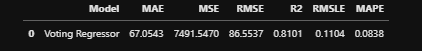

`석식` 

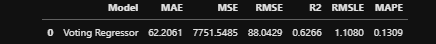

---
- 0711 17:51
    
식사가능자수 <- 식사가능자수/본사정원수로 잠시 변경, 휴가자수도 뺌

`중식`

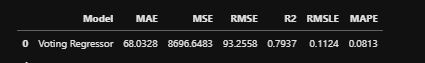

`석식`

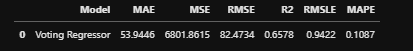

제출결과 안좋음.. 다시 복구

---
- 0712 00:23

휴가자수 임의로 더한걸 뺀다고 생각하고 출장자수를 없앴었음.... 그래서 계속 작게나옴;

이번엔 주, 년을 모두 추가하고 돌려봤다./ 해사꺼 비율시리즈 다 추가했더니 72점나옴.....

`중식`

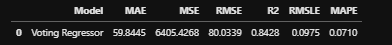

`석식`

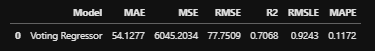

---
- 0712 01:15
    
최고기록에 주 랭크매핑 후 제출. 66.195점.. 낮게나옴



`중식`

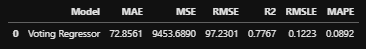

`석식`

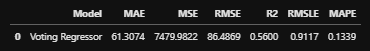

---
- 0714 
일 대신 주를 넣어서 비교.

`일을넣은 앙상블`

중식

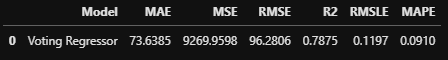

석식

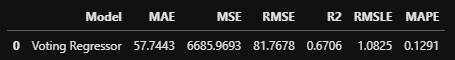

`주를넣은 앙상블`


중식

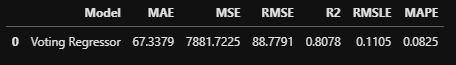

석식

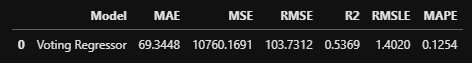

중식은 주를 넣고 석식은 일을 넣어보자 > 3점 더 안좋게나옴.. 그대로 일을 쓰자..

---
0715 0000

요일 더미 vs 요일 랭크 비교.

요일 랭크한게 더 점수가 좋음. 랭크사용!

---
0715 1700

여기서 '연휴' = 주말을 포함해서 휴일이 연속적으로 3일 이상일 때

비교해볼것 : 휴일 , 연휴 전날 다음날 다넣은거 / 휴일 , 연휴 전날만 넣은거  / 연휴만 넣은거 / 휴일만 넣은거
    
1.



2.

3.

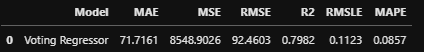

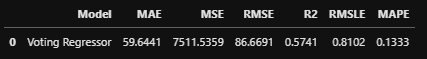

4.


---
연휴 전날만 넣은거

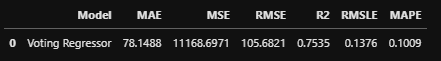

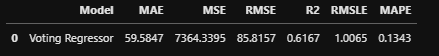


# `Catboost + Kfold`

In [ ]:
from catboost import CatBoostRegressor
cat = CatBoostRegressor()

model1 = cat
model2 = cat

model1.fit(x1_train, y1_train) #중식계
pred1 = model1.predict(x1_test)

model2.fit(x2_train, y2_train) #석식계
pred2 = model2.predict(x2_test)

from sklearn.model_selection import KFold

k_fold = KFold(n_splits = 5, shuffle = True, random_state = 777)

model1 = cat
models1 = [] # 교차검증을 위한 바구나 5개

for train_idx, val_idx in k_fold.split(x1_train):
    x1_t = x1_train.iloc[train_idx]
    y1_t = y1_train.iloc[train_idx]
    x1_val = x1_train.iloc[val_idx]
    y1_val = y1_train.iloc[val_idx]
    
    models1.append(model1.fit(x1_t, y1_t, eval_set = (x1_val, y1_val), early_stopping_rounds=100, verbose = 100))

preds1 = []
for model1 in models1:
    preds1.append(model1.predict(x1_test))    


model2 = cat
models2 = [] # 교차검증을 위한 바구나 5개

for train_idx, val_idx in k_fold.split(x2_train):
    x2_t = x2_train.iloc[train_idx]
    y2_t = y2_train.iloc[train_idx]
    x2_val = x2_train.iloc[val_idx]
    y2_val = y2_train.iloc[val_idx]
    
    models2.append(model2.fit(x2_t, y2_t, eval_set = (x2_val, y2_val), early_stopping_rounds=100, verbose = 100))
    

preds2 = []
for model2 in models2:
    preds2.append(model2.predict(x2_test))
    
pred1 = np.mean(preds1, axis=0)
pred2 = np.mean(preds2, axis=0)

submission['중식계'] = pred1
submission['석식계'] = pred2

submission.to_csv('catKfold.csv', index=False)

# `Catboost 만 `

In [51]:
from catboost import CatBoostRegressor
cat = CatBoostRegressor()

model1 = cat
model2 = cat

model1.fit(x1_train, y1_train) #중식계
pred1 = model1.predict(x1_test)

model2.fit(x2_train, y2_train) #석식계
pred2 = model2.predict(x2_test)

submission['중식계'] = pred1
submission['석식계'] = pred2


submission.to_csv('catholi_day2.csv', index=False)


Learning rate set to 0.040347
0:	learn: 203.9682021	total: 3.39ms	remaining: 3.38s
1:	learn: 198.8548748	total: 5.31ms	remaining: 2.65s
2:	learn: 193.9493867	total: 6.71ms	remaining: 2.23s
3:	learn: 189.4157737	total: 8.91ms	remaining: 2.22s
4:	learn: 185.1264031	total: 10.7ms	remaining: 2.12s
5:	learn: 180.8983479	total: 12.4ms	remaining: 2.06s
6:	learn: 176.7975526	total: 14.2ms	remaining: 2.02s
7:	learn: 172.9419347	total: 16.1ms	remaining: 1.99s
8:	learn: 169.3108510	total: 20.1ms	remaining: 2.22s
9:	learn: 165.7399928	total: 23.9ms	remaining: 2.36s
10:	learn: 162.7141764	total: 25.1ms	remaining: 2.25s
11:	learn: 159.6022316	total: 29.3ms	remaining: 2.42s
12:	learn: 156.9112742	total: 31.2ms	remaining: 2.37s
13:	learn: 154.0215648	total: 33ms	remaining: 2.32s
14:	learn: 151.2135714	total: 34.7ms	remaining: 2.28s
15:	learn: 148.5407456	total: 39.8ms	remaining: 2.45s
16:	learn: 146.0358637	total: 42.2ms	remaining: 2.44s
17:	learn: 143.9189549	total: 43.3ms	remaining: 2.36s
18:	learn:

In [78]:
submission

,일자,중식계,석식계
0,2021-01-27,1011.815281,127.264072
1,2021-01-28,952.196250,485.857827
2,2021-01-29,617.995745,211.180386
3,2021-02-01,1217.926335,554.960724
4,2021-02-02,1021.782263,536.357697
5,2021-02-03,1058.861313,519.371199
6,2021-02-04,1004.468807,551.301265
7,2021-02-05,756.119928,356.285132
8,2021-02-08,1270.010553,662.623204
9,2021-02-09,1069.941288,567.971509


In [ ]:
pred = model1.predict(x1_test)
mae = (mean_absolute_error(y1_test, pred))
r2 = r2_score(y1_test, pred)
print('Testing performance')
print('MAE: {:.2f}'.format(mae))
print('R2: {:.2f}'.format(r2))

In [ ]:
pred = model2.predict(x2_test)
mae = (mean_absolute_error(y2_test, pred))
r2 = r2_score(y_test2, pred)
print('Testing performance')
print('MAE: {:.2f}'.format(mae))
print('R2: {:.2f}'.format(r2))

# `NEW CatBOOST` 석식계로 중식계를 예측

In [ ]:
# # 일단 석식계만 예측

# from catboost import CatBoostRegressor
# cat = CatBoostRegressor()

# model1 = cat
# model2 = cat

# model2.fit(x2_train, y2_train) #석식계
# pred2 = model2.predict(x2_test)

# submission['석식계'] = pred2

In [34]:
# # 예측한 걸 테스트에 변수로 넣음
# test['석식계'] = pred2

In [35]:
# # 예측한 걸 테스트에 변수로 넣음
# x1_train = train[['요일', '본사시간외근무명령서승인건수', '식사가능자수','월(중식)', '일','공휴일전후_0','공휴일전후_1','공휴일전후_2','본사출장자수','석식계']] #중식계

# x1_test = test[['요일', '본사시간외근무명령서승인건수', '식사가능자수', '월(중식)', '일','공휴일전후_0','공휴일전후_1','공휴일전후_2','본사출장자수','석식계']] #중식계

In [69]:
# # 석식계를 이용해서 중식계 예측

# model1.fit(x1_train, y1_train) #중식계
# pred1 = model1.predict(x1_test)

In [38]:
# # 최종결과
# submission['중식계'] = pred1
# submission['석식계'] = pred2
# submission.to_csv('catlun.csv', index=False)

In [180]:
train.tail(100)

,일자,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식계,석식계,요일(석식),년,...,주(중식),주(석식),식사가능자수,휴일전날,휴일다음날,요일_0,요일_1,요일_2,요일_3,요일_4
1105,2020-08-25,2989,219,190,757,285.0,1046.0,632.0,2,2020,...,12,29,2485.0,0,0,0,1,0,0,0
1106,2020-08-26,2989,215,197,2,363.0,897.0,495.0,5,2020,...,12,29,2411.0,0,0,0,0,1,0,0
1107,2020-08-27,2989,205,211,575,316.0,963.0,522.0,3,2020,...,12,29,2468.0,0,0,0,0,0,1,0
1108,2020-08-28,2989,320,230,0,297.0,784.0,354.0,4,2020,...,12,29,2372.0,1,0,0,0,0,0,1
1109,2020-08-31,2989,183,163,648,464.0,1243.0,649.0,1,2020,...,20,11,2342.0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,2021-01-20,2983,75,198,4,391.0,1093.0,421.0,5,2021,...,22,35,2517.0,0,0,0,0,1,0,0
1201,2021-01-21,2983,92,231,462,351.0,832.0,353.0,3,2021,...,22,35,2540.0,0,0,0,0,0,1,0
1202,2021-01-22,2983,255,248,1,303.0,579.0,217.0,4,2021,...,22,35,2425.0,1,0,0,0,0,0,1
1203,2021-01-25,2983,107,153,616,327.0,1145.0,502.0,1,2021,...,17,49,2549.0,0,1,1,0,0,0,0


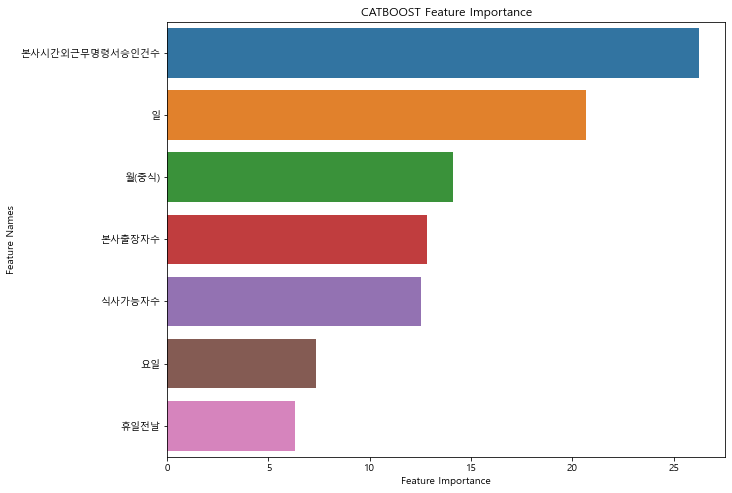

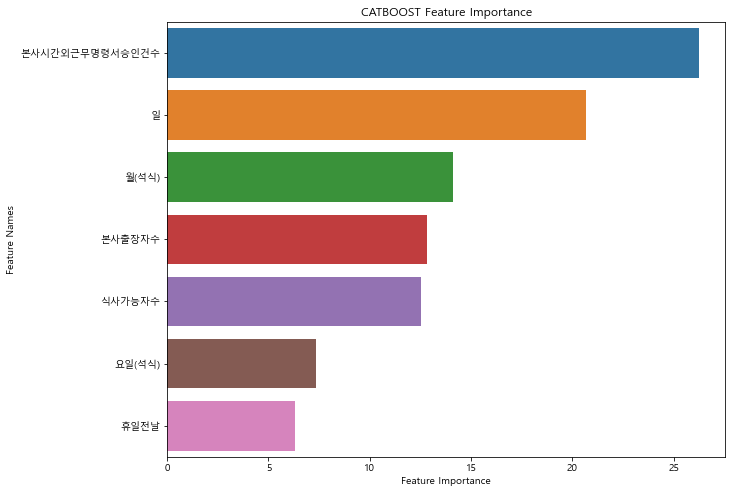

In [52]:
def plot_feature_importance(importance,names,model_type):
    
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)
    
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    plt.figure(figsize=(10,8))

    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])

    plt.title(model_type + ' Feature Importance')
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature Names')



plot_feature_importance(model1.get_feature_importance(),x1_test.columns,'CATBOOST')

plot_feature_importance(model2.get_feature_importance(),x2_test.columns,'CATBOOST')